In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pairing_poisson_attenuation as pair
reload(pair)
%matplotlib inline

In [7]:
#time constants
taul=0.01
taus=0.003
fac=(1./((taul-taus)))
inteps=fac*(taul-taus)
intepsquad=(fac**2)*(taul/2-(2/(1/taul+1/taus))+taus/2)
print(intepsquad)
dt=0.0005


#input rate
input_rate=5.

#rate of post synaptic stimulation
post_rate=20.

#initial weight (all excitatory)
initial_weight=0.05 #need to choose smaller weights here because of higher EPSP variance with just one neuron, also no tonic inhibition here.

#learning rate
lr=0.003

38.4615384615


In [8]:
parameter={
    "taul":taul,
    "taus":taus,
    "dt":dt,
    "kernel":pair.eps,
    "intepsquad":intepsquad,
    "inteps":inteps,
    "rate":input_rate,
    "lr":lr,
    "rho":pair.sigmoidal,
    "rhoprime":pair.sigmoidalp,
    "threshold":10.,#rest=-70., center=-60.
    "slope":0.3,#saturation around -50
    "maxfire":100.,
    "post_rate":post_rate,
    "g1":pair.g1,
    "g2":pair.g2,
    "f":pair.fsigmoid,
    "init":pair.init,
    "pre_learning_time":.5,
    "learning_time":5.,
    "interval_length":0.05,
    "total_time":5.5,
    "ampa_att_cst":1.,
    "att":pair.lin_att_der,
    "learning_rule":pair.ngradient,
    "percentage":1, #0 for absolute weight change plot, 1 for relative
        }

In [9]:
print(parameter["maxfire"]*pair.sigmoidal(initial_weight*input_rate,**parameter))


5.093147025294354


Pairing protocol for one synapse excitatory pre/post pairing at different rates and different weights.

In [10]:
weight=initial_weight
parameter["att"]=pair.lin_att_der
d=np.zeros(10)
deltaw=np.zeros(10)
for i in range(10):
    d[i]=(i+1.)
    parameter["dist"]=d[i]
    w=pair.nlearning(weight,**parameter)["weight"]
    deltaw[i]=w[-1]/w[0]
np.save("distances",d)
np.save("att_weight_change",100.*(deltaw-np.ones(10)))
np.save("time_parameters",{"pre_learning_time":parameter["pre_learning_time"],
                          "learning_time":parameter["learning_time"],
                          "interval_length":parameter["interval_length"],
                          "dt":parameter["dt"]})

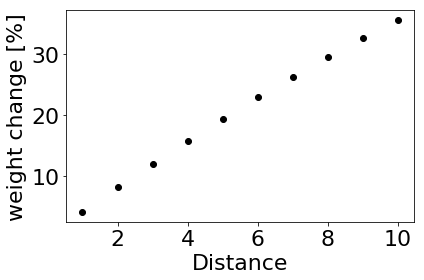

In [11]:
parameter["ofile"]="linear_attenuation.svg"
pair.plot_var_deltaw(d,deltaw-np.ones(10),**parameter)

In [12]:
weight=initial_weight
parameter["dist"]=1.
parameter["att"]=pair.lin_att_der

In [13]:
pweights=pair.nlearning(weight,**parameter)["weight"]
np.save("attenuation_proximal_synapse",pweights)

In [14]:
weight=initial_weight
parameter["dist"]=10.
parameter["att"]=pair.lin_att_der

In [15]:
dweights=pair.nlearning(weight,**parameter)["weight"]
np.save("attenuation_distal_synapse",dweights)

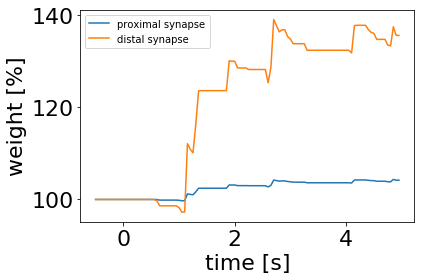

In [16]:
weights=np.array((pweights,dweights))
rates=np.array((parameter["rate"],parameter["rate"]))
parameter["label"]=("proximal synapse","distal synapse")
parameter["ofile"]="2018-11-21_pairing_different_distances_poisson.svg"
pair.plotLTP(weights,rates,**parameter)